# Mathematics of Machine Learning

## Programming tasks: Examples for Logistic Regression

### (1) Preparation

(a) Import required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.optimize as opt 

# change font size for all matplotlib plots
plt.rc('font', size=16)

(b) Generate the training data

In [122]:
# Setting seed for random number generation for reproducibility 
rng = np.random.default_rng(seed=42)

# Size of the dataset
m = 50

# Randomly sampled features
x = rng.uniform(low=-3, high=3, size=(2, m))

# true parameters of linear hypotheses
w_true = np.array([1, 2])

# True probabilities for label +1 according to the Bernoulli model with h_{w_true,0}
p = 1/(1 + np.exp(-(w_true @ x)))

# Sample the random labels according to the probabilities p
y = 2*(rng.uniform(low=0, high=1, size=m) <= p) - 1

(c) Graphical visualization of the training data

First plot the true hyperplane for x in [-3,3], then add the classified training data

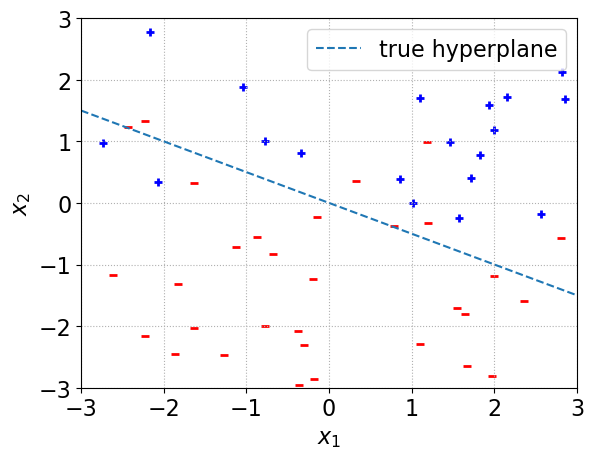

In [123]:
# indices of points with mark 1
inds = np.where(y==1)

# indices of points with mark -1
indm = np.where(y==-1)

# First plot the true hyperplane for x in [-3,3].
fig, ax = plt.subplots()
xvec = np.array([-3, 3])
yvec = -w_true[0]/w_true[1]*xvec
ax.plot(xvec, yvec, "--", label="true hyperplane")

# Then add the training data points according to its label
ax.scatter(x[0][inds], x[1][inds], c="b", marker="+", linewidths = 2)
ax.scatter(x[0][indm], x[1][indm], c="r", marker="_", linewidths = 2)

ax.legend()
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set(xlim=(-3, 3), ylim=(-3, 3))
ax.grid(linestyle='dotted')
plt.show()

### (2) Logistic regression

(a) Defining the empirical risk function

In [124]:
# Plain implementation of empirical risk:
# FILLED BY YOU:
RS = lambda w, x, y: ... y * (np.atleast_2d(w) @ x) ... # take mean over columns

# Implementation of empirical risk which allows for multiple weight vectors w:
# FILLED BY YOU:
RS_vec = lambda w, x, y: ... np.atleast_2d(y) * (w.T @ x) ...  # take mean over columns

**NOTES**:

1) w is a column vector with two rows OR a matrix with two rows and multiple columns for multiple weight vectors w.
2) mean(·, 2) calculates the mean value per column
3) The function should be evaluable for multiple w vectors, so that the result contains as row vector the empirical risk values of the individual w vectors.

(b) Plot the empirical risk for various values of w

2253001


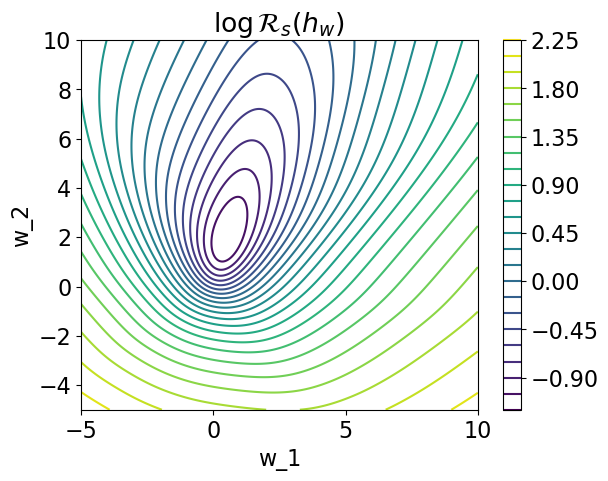

In [134]:
# Discretization of the w-values per axis
ws = np.arange(-5, 10 + 0.01, 0.01)

# Create discretization grid
WW1, WW2 = np.meshgrid(ws, ws)

# Turn 2D arrays WW1, WW2 into long vectors
WW1_ravel = np.ravel(WW1)
WW2_ravel = np.ravel(WW2)
print(len(WW2_ravel))

# Evaluate RS at the grid points
WW = np.vstack((WW1_ravel, WW2_ravel))
RS_Ws = RS_vec( WW, x, y)

# Generate graphic (contour plot):
fig, ax = plt.subplots()
CS = ax.contour(WW1, WW2, np.reshape(np.log(RS_Ws), (len(ws), len(ws))), 25)
ax.set_title('$\log \mathcal{R}_s(h_w)$')
ax.set_xlabel('w_1')
ax.set_ylabel('w_2')
fig.colorbar(CS)
plt.show()

(c) Training via empirical risk minimization (maximum likelihood estimation) 

In [139]:
# Numerical calculation of the ERM rule
result = opt.minimize(fun=RS, x0=[0,0], args=(x,y), 
                      options={'disp': False, 'maxiter': 1000})
RS_min = result.fun
w_s = result.x
# Outputting the results
display(result)

[0.53579791 1.99714875]
0.30324795150929784
69
131
0


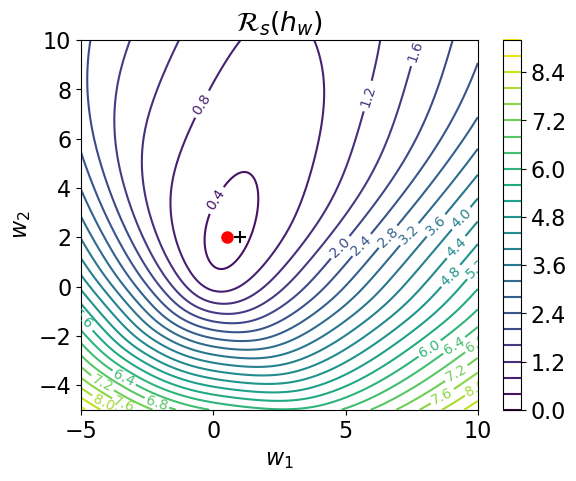

In [189]:
# Plot the learned parameters
fig, ax = plt.subplots()

# Countur lines of empirical risk
CS = ax.contour(WW1, WW2, np.reshape((RS_Ws), (len(ws), len(ws))), 25)

ax.clabel(CS, inline=True, fontsize=10)

# learned w
ax.scatter(w_s[0], w_s[1], s=64, c="r")

# true w
ax.scatter(w_true[0], w_true[1], marker="+", s=64, c="k")

ax.set_title('$\mathcal{R}_s(h_w)$')
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$')

fig.colorbar(CS)
plt.show()

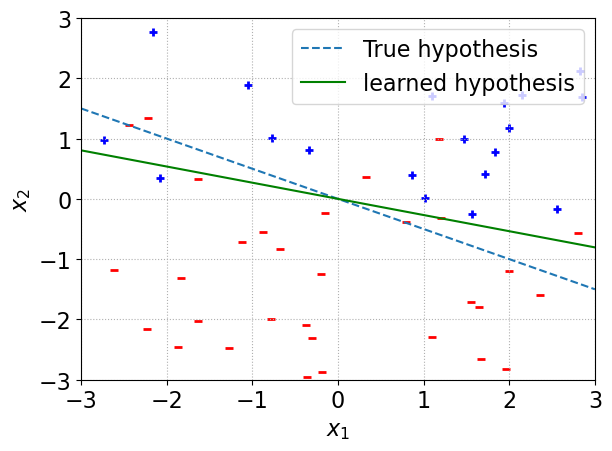

In [141]:
# Plot the learned hypothesis and training data
fig, ax = plt.subplots()
xvec = np.array([-3,3])
yvec = -w_true[0]/w_true[1]*xvec
ax.plot(xvec, yvec, "--", label="True hypothesis")
ax.plot(xvec, -w_s[0]/w_s[1]*xvec, c="g", label="learned hypothesis")
ax.scatter(x[0][inds], x[1][inds], c="b", marker="+", linewidths = 2)
ax.scatter(x[0][indm], x[1][indm], c="r", marker="_", linewidths = 2)
ax.legend(loc="upper right")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set(xlim=(-3, 3), ylim=(-3, 3))
ax.grid(linestyle='dotted')
fig.tight_layout()

(d) Plotting the "logistic" hypotheses in 3D

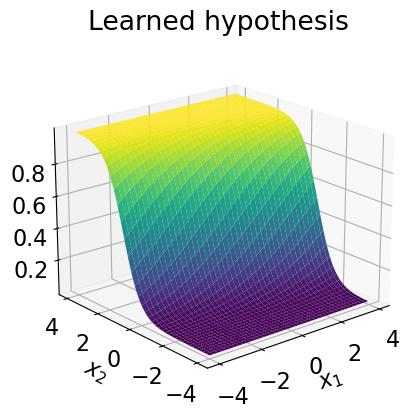

In [180]:
# Grid of features values x
xs = np.arange(-4, 4, 0.05)
XX1, XX2 = np.meshgrid(xs, xs)

# Logistic hypotheses
h = lambda w,x1,x2: 1/(1 + np.exp(- w[0] * x1 - w[1]*x2 ) )
PP_s = h(w_s,XX1,XX2)

# Plotting the hypothesis
fig, ax = plt.subplots(1,1, subplot_kw={"projection": "3d"})
ax.plot_surface(XX1, XX2, PP_s, vmin=0, vmax=1,
                cmap=cm.viridis,  # the 'viridis' colormap
                edgecolor='none',linewidth=0)#, antialiased=False)
ax.set_title('Learned hypothesis')
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.grid(linestyle='dotted')
ax.view_init(20, 230)
plt.show()